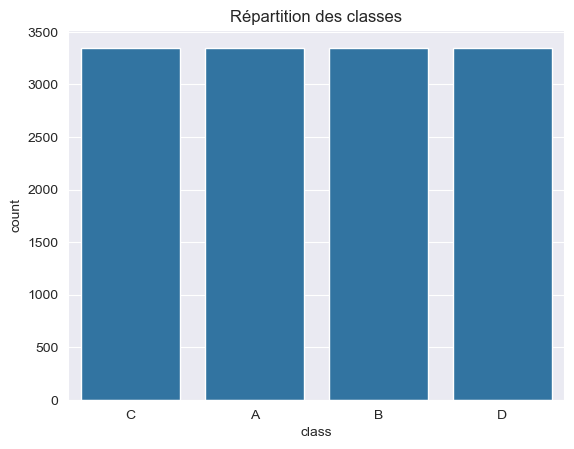

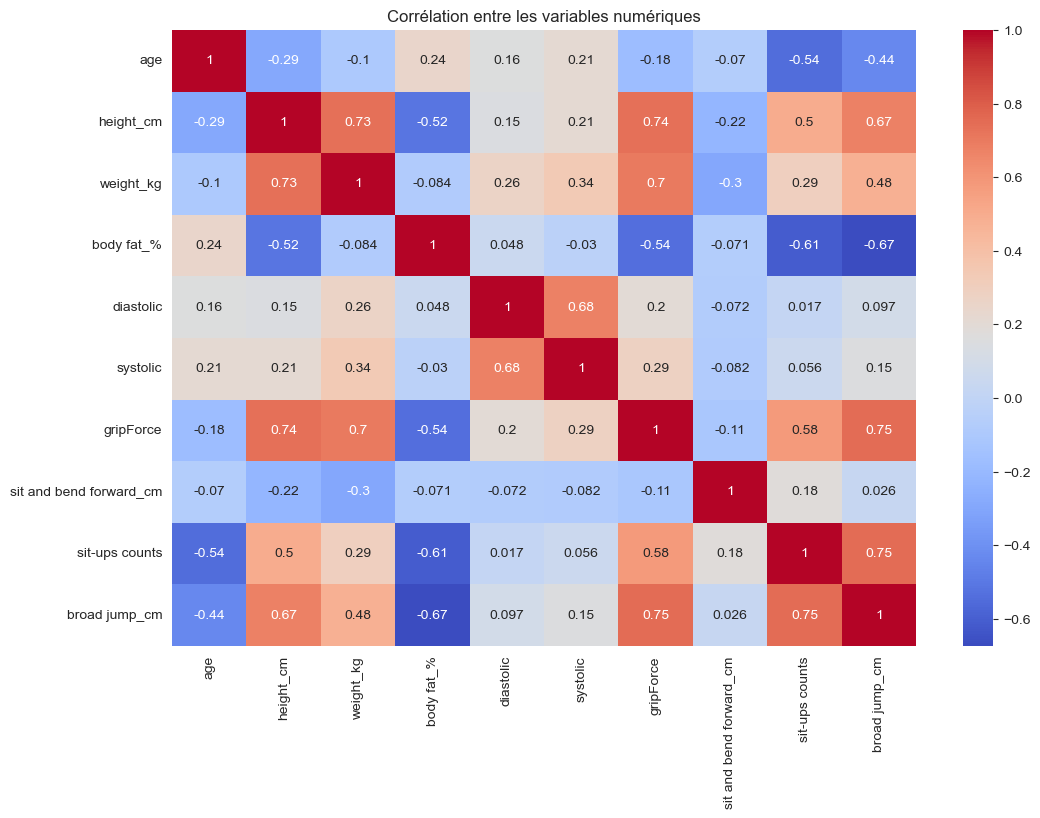

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/body_performance.csv")

df.head()

df.describe(include='all')

df.isnull().sum()

df.dtypes

sns.countplot(x='class', data=df)
plt.title("Répartition des classes")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=["gender", "class"]).corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation entre les variables numériques")
plt.show()

In [5]:
means = df.mean(numeric_only=True)
print("Moyennes de chaque colonne numérique :\n")
print(means)

🔢 Moyennes de chaque colonne numérique :

age                         36.775106
height_cm                  168.559807
weight_kg                   67.447316
body fat_%                  23.240165
diastolic                   78.796842
systolic                   130.234817
gripForce                   36.963877
sit and bend forward_cm     15.209268
sit-ups counts              39.771224
broad jump_cm              190.129627
dtype: float64


/var/folders/c5/yylzhls11ys8m61qp495491m0000gn/T/ipykernel_8931/709790234.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=means_df, y='Variable', x='Moyenne', palette='viridis')


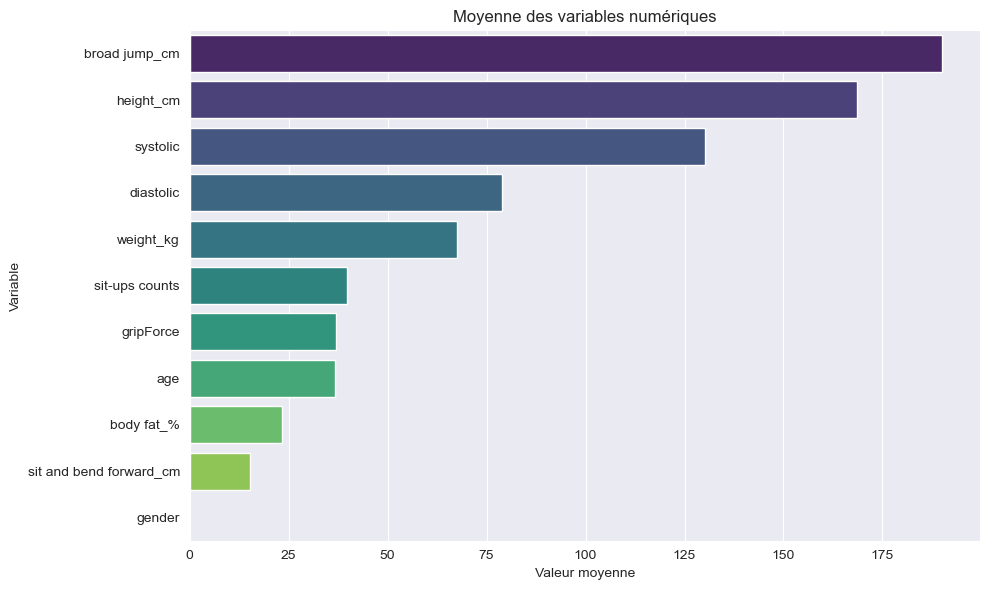

In [23]:
means = df.mean(numeric_only=True)

means_df = means.reset_index()
means_df.columns = ['Variable', 'Moyenne']
means_df = means_df.sort_values(by='Moyenne', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=means_df, hue='Variable', x='Moyenne', palette='viridis')
plt.title("Moyenne des variables numériques")
plt.xlabel("Valeur moyenne")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()



/var/folders/c5/yylzhls11ys8m61qp495491m0000gn/T/ipykernel_8931/3996955324.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], fill=True, color='skyblue')
/Users/canse/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


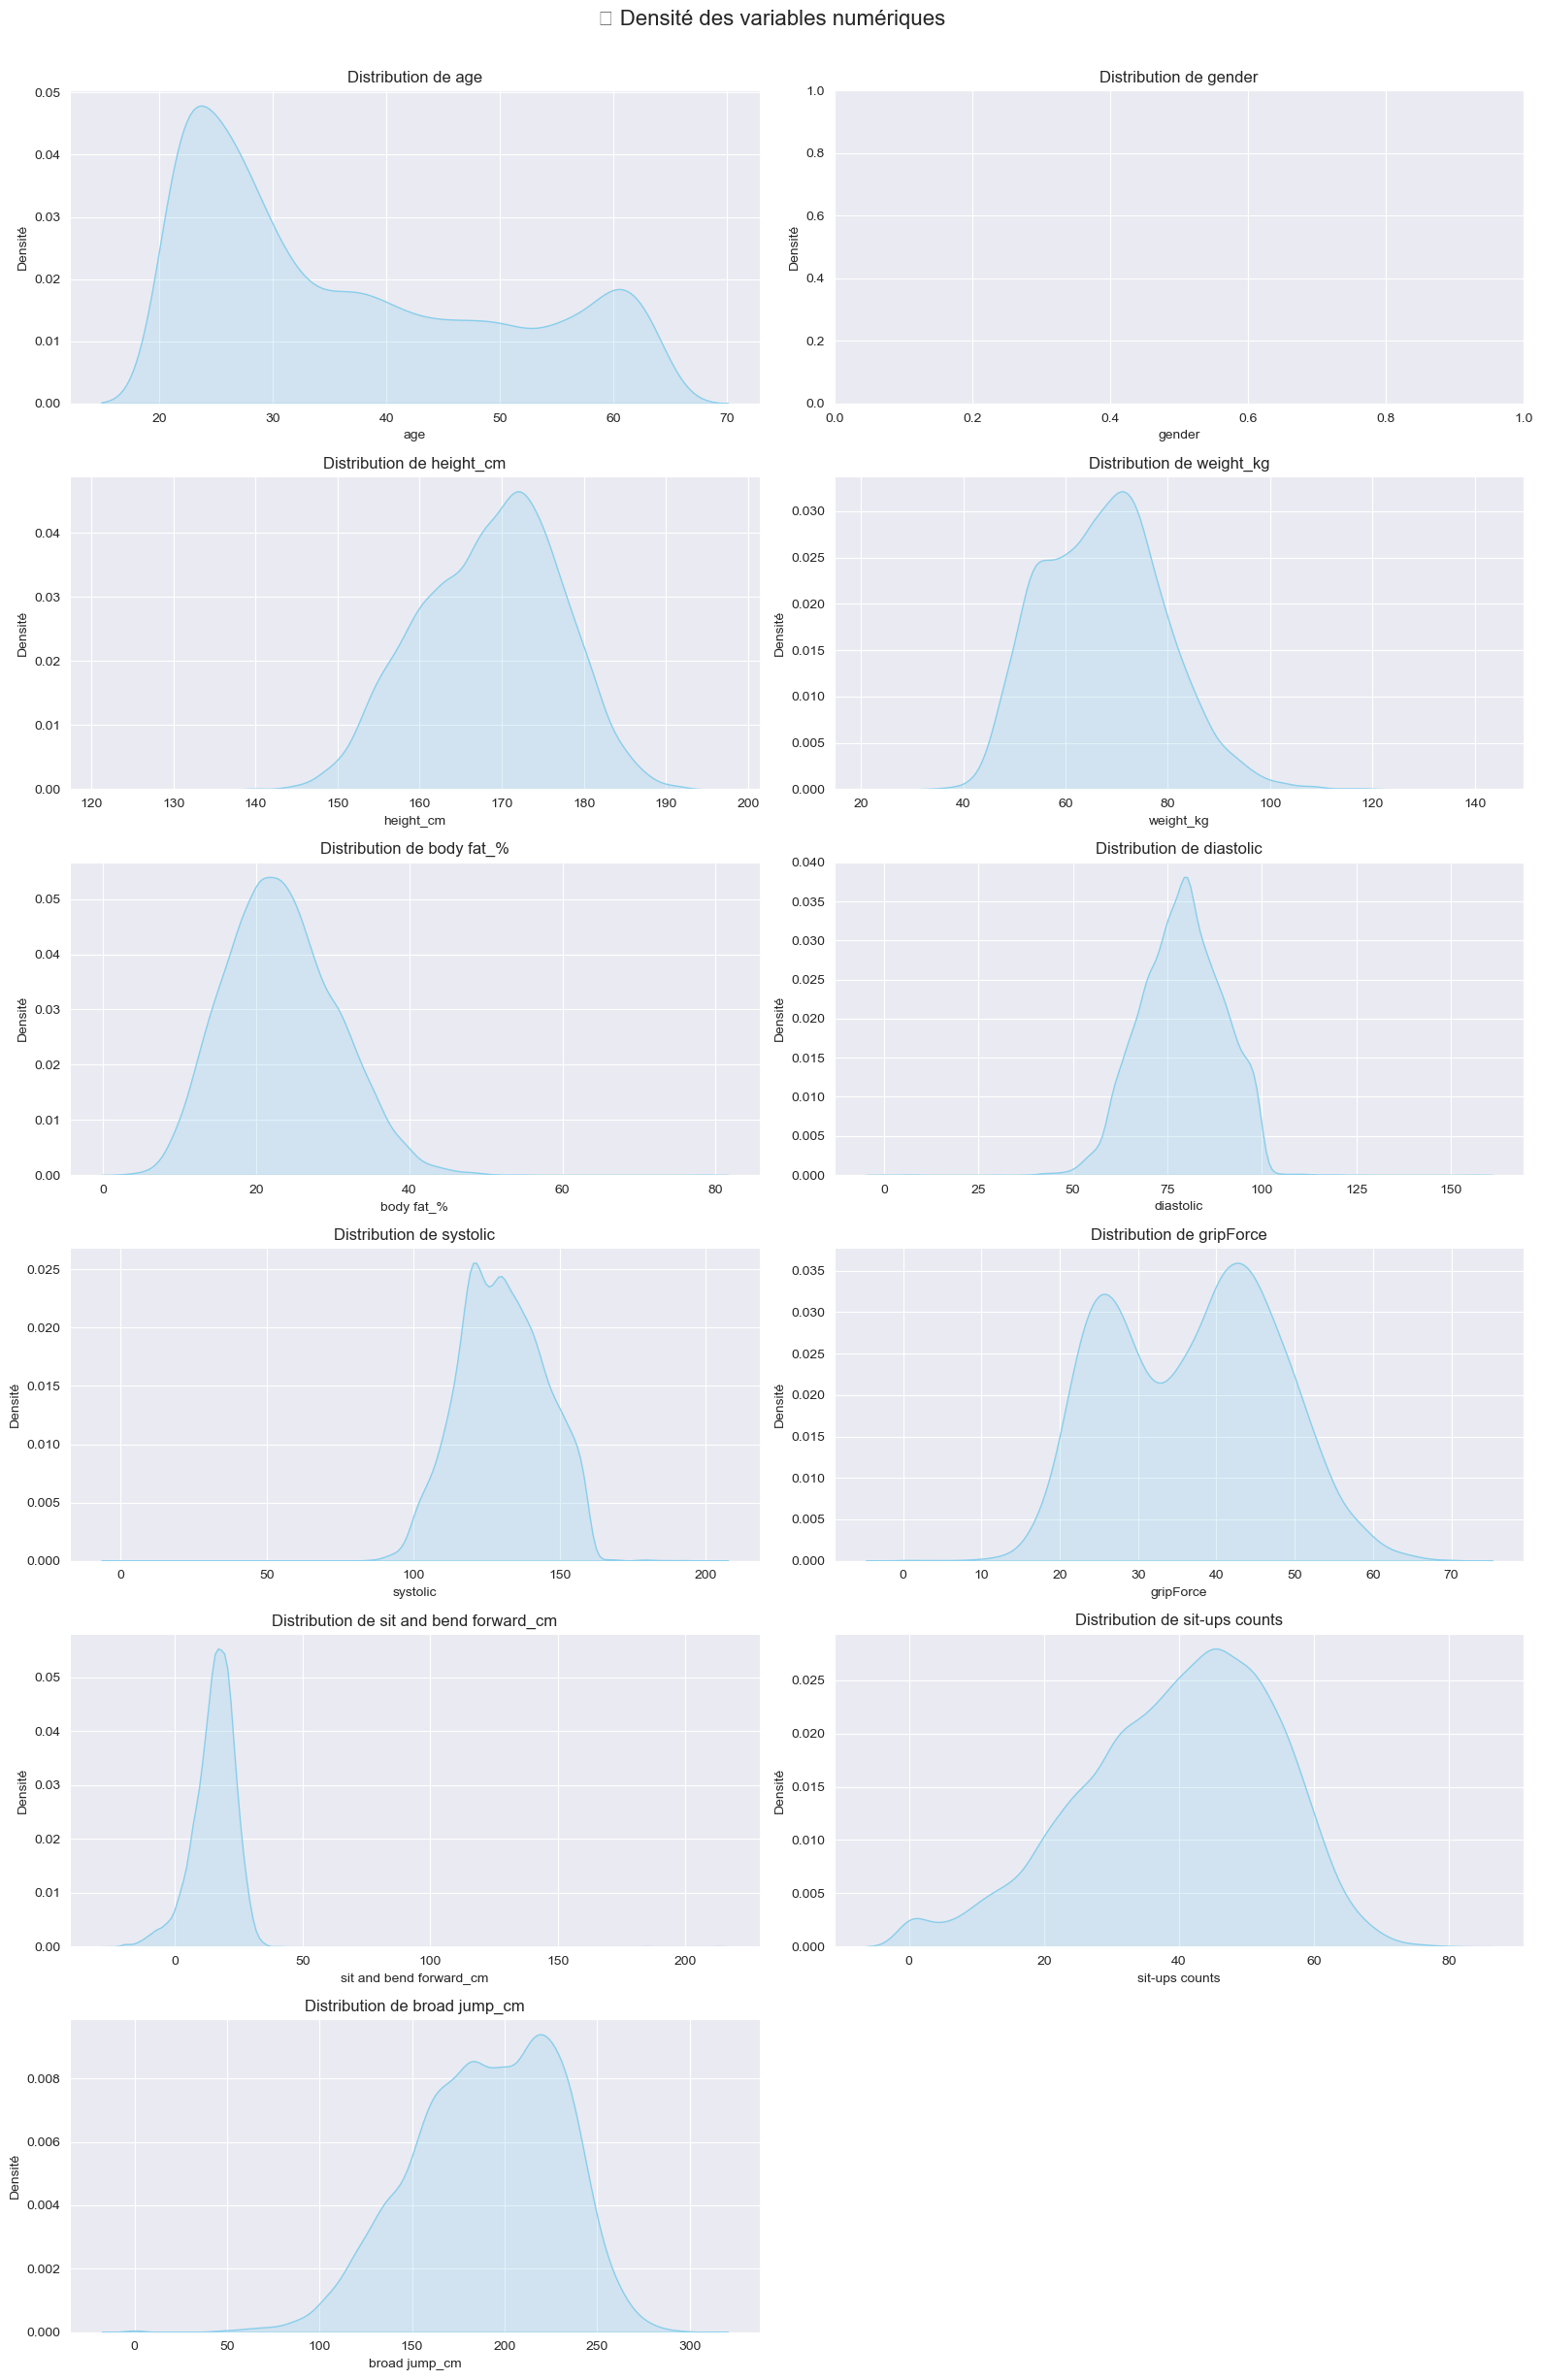

In [13]:

# Encodage si pas encore fait
if df['gender'].dtype == 'object':
    df['gender'] = df['gender'].map({'M': 1, 'F': 0})

numerical_cols = df.select_dtypes(include='number')
if 'class' in numerical_cols.columns:
    numerical_cols = numerical_cols.drop(columns=['class'])

plt.figure(figsize=(16, 24))

for i, col in enumerate(numerical_cols.columns):
    plt.subplot(len(numerical_cols.columns) // 2 + 1, 2, i + 1)
    sns.kdeplot(df[col], fill=True, color='skyblue')
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel("Densité")
    plt.tight_layout()

plt.suptitle("📈 Densité des variables numériques", fontsize=16, y=1.02)
plt.show()


NameError: name 'numerical_cols' is not defined

<Figure size 1600x2400 with 0 Axes>

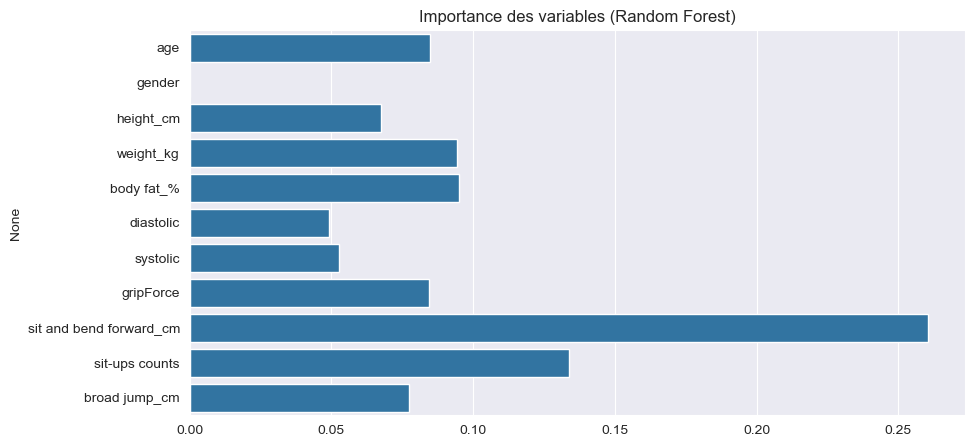

In [14]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=["class"])
y = df["class"]
rf = RandomForestClassifier()
rf.fit(X, y)

importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=features)
plt.title("Importance des variables (Random Forest)")
plt.show()

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X_clean = X.dropna()
y_clean = y.loc[X_clean.index]

X_scaled = StandardScaler().fit_transform(X_clean)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(pca_components, columns=["PC1", "PC2"])
df_pca["class"] = y_clean.reset_index(drop=True)

sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="class", palette="Set2")
plt.title("Projection PCA des individus (après suppression des NaN)")
plt.show()


/Users/canse/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/canse/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/canse/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Found array with 0 sample(s) (shape=(0, 11)) while a minimum of 1 is required by StandardScaler.

/var/folders/c5/yylzhls11ys8m61qp495491m0000gn/T/ipykernel_8931/2759385597.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, palette="Set2")


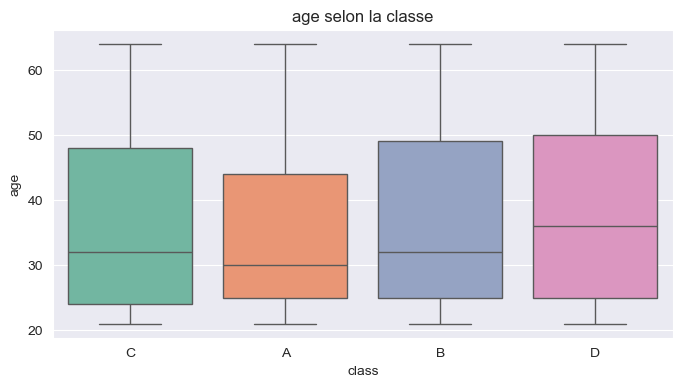

/var/folders/c5/yylzhls11ys8m61qp495491m0000gn/T/ipykernel_8931/2759385597.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, palette="Set2")


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

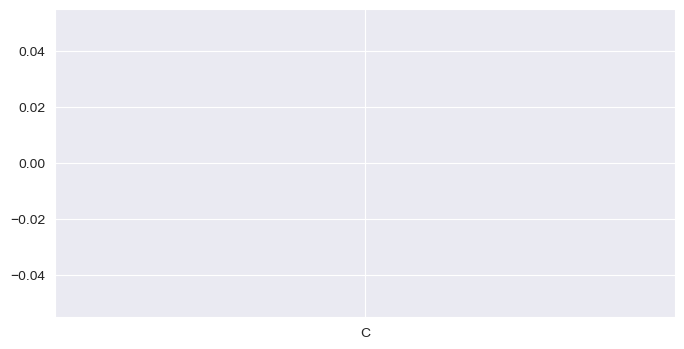

In [16]:
for col in numerical_cols.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='class', y=col, data=df, palette="Set2")
    plt.title(f"{col} selon la classe")
    plt.show()

/Users/canse/miniconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['gender']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


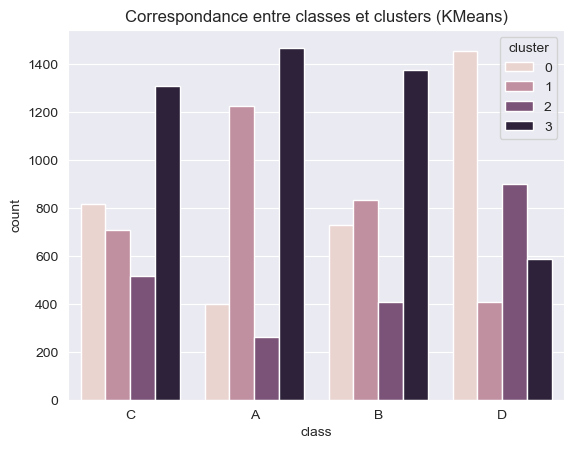

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_clustered = df.copy()
df_clustered["cluster"] = clusters

sns.countplot(x="class", hue="cluster", data=df_clustered)
plt.title("Correspondance entre classes et clusters (KMeans)")
plt.show()